In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('Admission_predict.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.shape

(400, 9)

In [8]:
# no need of *encoding* because data does not contain the string values
#No need of *scaling* because we use decision tree Algorithm

In [14]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold = 0.75)
df ['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])
#we import Binarizer class to convert the data of the column "Chance of Admit" into "0" and "1" .....so we pass threshold value 0.75
#if the threshold value is above 0.75 the it becomes 1 and otherwise it becomes 0

In [15]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [16]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']
#drop the column 	Chance of Admit

In [17]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [18]:
y
#the data type of the y is float
# convert it into int

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [19]:
y = y.astype('int')
#using astype we change the datatype

In [21]:
y
#now the data type of the y becomes int

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

<Axes: xlabel='Chance of Admit ', ylabel='count'>

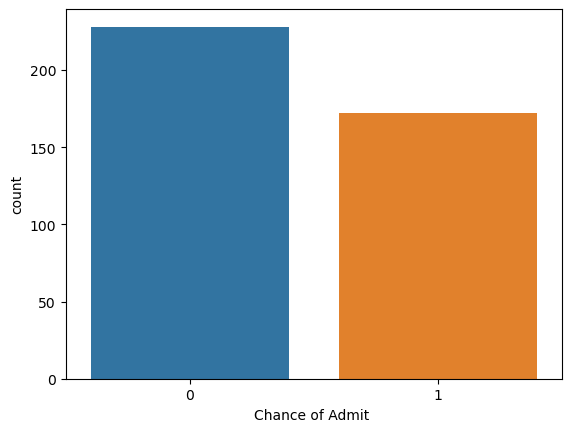

In [22]:
sns.countplot(x = y)
#it shows the graph ..how many students are admitted and how many not

In [23]:
y.value_counts()

0    228
1    172
Name: Chance of Admit , dtype: int64

In [25]:
#cross validation

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0,test_size = 0.25)

In [26]:
x_train.shape

(300, 8)

In [27]:
x_test.shape

(100, 8)

In [28]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
classifier = DecisionTreeClassifier(random_state = 0)

In [31]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_pred = classifier.predict(x_test)

In [33]:
result = pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred
})

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

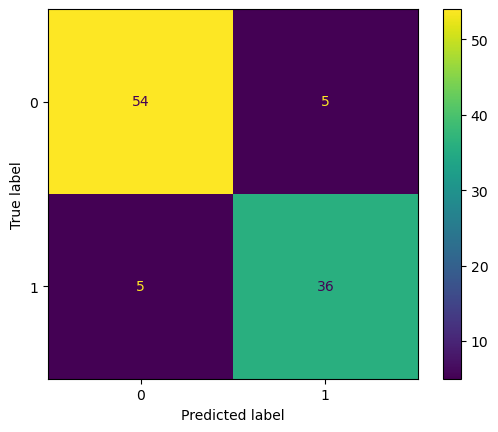

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [39]:
accuracy_score(y_test,y_pred)

0.9

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [43]:
#-----------------------------------------------------------------------------
#we check our model is predicted or not correctly
new = [[136,314,109,4,3.5,4.0,8.77,1]]
classifier.predict(new)[0]


#it gives 0 or 1
#1 means student admitted


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [44]:
from sklearn.tree import plot_tree

In [45]:
import matplotlib.pyplot as plt

[Text(0.565625, 0.95, 'CGPA <= 8.655\ngini = 0.492\nsamples = 300\nvalue = [169, 131]\nclass = NA'),
 Text(0.365625, 0.85, 'LOR  <= 4.25\ngini = 0.14\nsamples = 159\nvalue = [147, 12]\nclass = NA'),
 Text(0.25625, 0.75, 'GRE Score <= 319.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]\nclass = NA'),
 Text(0.1625, 0.65, 'SOP <= 4.75\ngini = 0.056\nsamples = 138\nvalue = [134, 4]\nclass = NA'),
 Text(0.1, 0.55, 'CGPA <= 8.51\ngini = 0.043\nsamples = 135\nvalue = [132, 3]\nclass = NA'),
 Text(0.05, 0.45, 'SOP <= 3.25\ngini = 0.017\nsamples = 119\nvalue = [118, 1]\nclass = NA'),
 Text(0.025, 0.35, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]\nclass = NA'),
 Text(0.075, 0.35, 'GRE Score <= 310.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]\nclass = NA'),
 Text(0.05, 0.25, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = NA'),
 Text(0.1, 0.25, 'GRE Score <= 311.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = NA'),
 Text(0.075, 0.15, 'CGPA <= 8.355\ngini = 0.5\nsamples = 2\nvalue = 

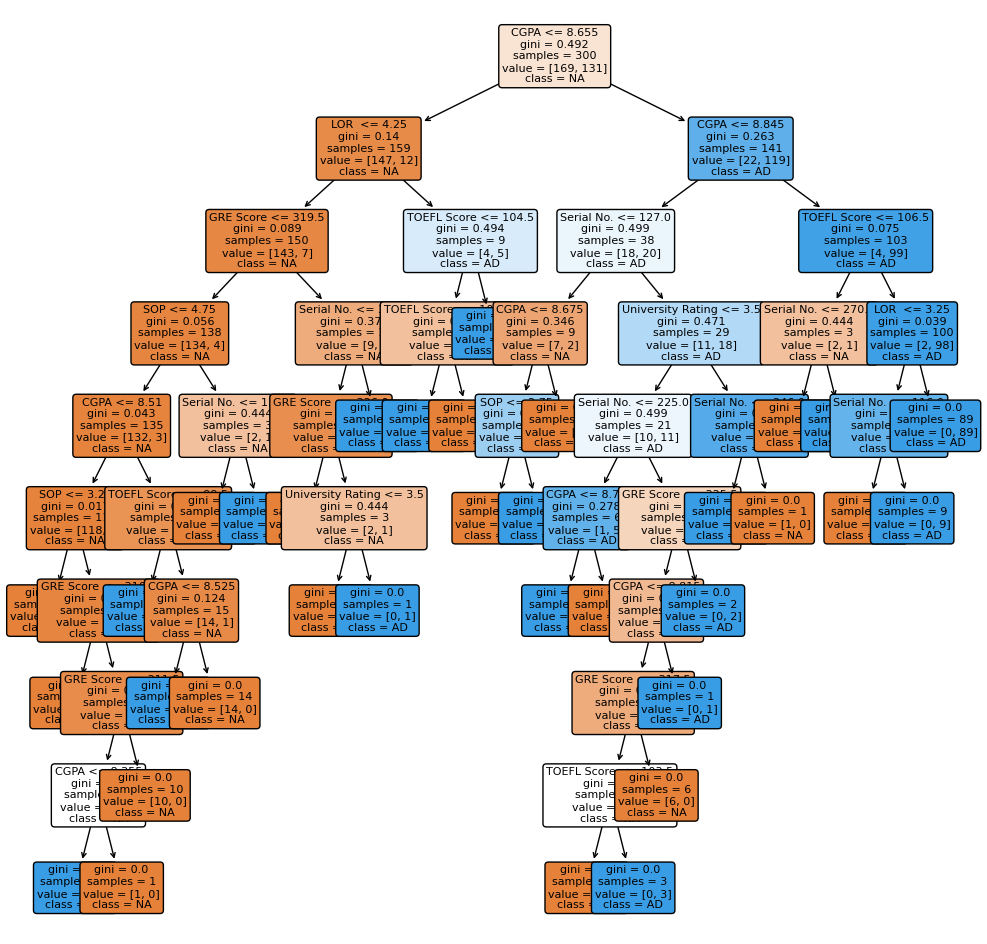

In [47]:
plt.figure(figsize = (12,12))
plot_tree(classifier,fontsize = 8,filled = True,rounded = True, feature_names = x.columns,class_names = ['NA','AD'])